# Import Libraries 

In [1]:
# import libraries
import pandas as pd
import datetime 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Transactional Dataset Overview  

- This dataset contains all transactions between **01/12/2010 and 09/12/2011** for a **UK-based, registered non-store online retailer**.  
- The company primarily sells **unique, all-occasion gifts**.  
- Many of its customers are **wholesalers**.  
- The dataset includes **half a million transactions**.  
- The full dataset can be downloaded from [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/352/online+retail).  

## Project Scope  

- A **20% random sample** from the original dataset is used in this project.  
- The focus of the analysis is **cohort analysis** to study customer behavior over time.  


# Exploratory Data Analysis

In [2]:
online_df = pd.read_csv('online.csv')

In [3]:
online_df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [4]:
online_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70864 non-null  int64  
 1   InvoiceNo    70864 non-null  int64  
 2   StockCode    70864 non-null  object 
 3   Description  70864 non-null  object 
 4   Quantity     70864 non-null  int64  
 5   InvoiceDate  70864 non-null  object 
 6   UnitPrice    70864 non-null  float64
 7   CustomerID   70864 non-null  int64  
 8   Country      70864 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 4.9+ MB


In [5]:
# Drop the Unnamed "column
online_df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
online_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    70864 non-null  int64  
 1   StockCode    70864 non-null  object 
 2   Description  70864 non-null  object 
 3   Quantity     70864 non-null  int64  
 4   InvoiceDate  70864 non-null  object 
 5   UnitPrice    70864 non-null  float64
 6   CustomerID   70864 non-null  int64  
 7   Country      70864 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 4.3+ MB


### Comment:  
#### The invoice date is currently parsed as an object type and needs to be converted to datetime.  


In [7]:
online_df['InvoiceDate'] = pd.to_datetime(online_df['InvoiceDate'])

# Display dataset info
online_df.info()

# Show a few converted values for verification
print(online_df['InvoiceDate'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    70864 non-null  int64         
 1   StockCode    70864 non-null  object        
 2   Description  70864 non-null  object        
 3   Quantity     70864 non-null  int64         
 4   InvoiceDate  70864 non-null  datetime64[ns]
 5   UnitPrice    70864 non-null  float64       
 6   CustomerID   70864 non-null  int64         
 7   Country      70864 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.3+ MB
0   2011-10-25 08:26:00
1   2011-11-20 11:56:00
2   2011-07-14 13:35:00
3   2011-11-23 15:53:00
4   2011-05-25 13:36:00
Name: InvoiceDate, dtype: datetime64[ns]


### Comment:  
#### The data has been parsed correctly, and we are now ready for exploratory data analysis.  


In [8]:
# Find number of unique countries
online_df['Country'].unique()

array(['United Kingdom'], dtype=object)

In [9]:
#### Since all customers are from the United Kingdom, the `Country` column has no variance and can be safely dropped.
online_df.drop(['Country'], axis=1, inplace=True)

In [10]:
online_df['InvoiceNo'].nunique()

13858

In [11]:
# Visualize number of unique 

## Assigning Acquisition Month Cohort  

- **Define a truncation function**:  
  - Create a function that truncates a given date to the first day of its month.  

- **Generate the `InvoiceMonth` column**:  
  - Apply the truncation function to the `InvoiceDate` column.  

- **Group by `CustomerID`**:  
  - Create a `groupby()` object using `CustomerID`.  
  - Use the `InvoiceMonth` column for further analysis.  

- **Assign the cohort month**:  
  - Apply `transform()` with `min()` to assign each customer their earliest `InvoiceMonth`.  

- **Final outcome**:  
  - Each customer is assigned an **acquisition cohort** based on their first purchase month.  
  - Two new columns, `InvoiceMonth` and `CohortMonth`, have been added.  

- **Next step**:  
  - Calculate the **time offset** for cohort analysis.  


In [12]:

def get_month(x: datetime.datetime) -> datetime.datetime:
    """
    Truncates a given datetime object to the first day of the month.
    
    Args:
    - x (datetime.datetime): The datetime object to truncate.
    
    Returns:
    - datetime.datetime: The truncated datetime object, representing the first day of the month.
    """
    if not isinstance(x, datetime.datetime):
        raise ValueError("Input must be a datetime object")
    return datetime.datetime(x.year, x.month, 1)


In [13]:
# The InvoiceMonth column now holds the first day of the month for each transaction.
# The CohortMonth column holds the first purchase month (earliest InvoiceMonth) for each customer, identifying when they first interacted with the company.

online_df['InvoiceMonth'] = online_df['InvoiceDate'].apply(get_month)
online_df['CohortMonth'] = online_df.groupby(['CustomerID'])['InvoiceMonth'].transform('min')

In [14]:
online_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,CohortMonth
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,2011-10-01,2011-04-01
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,2011-11-01,2011-09-01
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,2011-07-01,2011-07-01
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,2011-11-01,2011-11-01
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,2011-05-01,2011-02-01
...,...,...,...,...,...,...,...,...,...
70859,575063,22804,PINK HANGING HEART T-LIGHT HOLDER,1,2011-11-08 12:32:00,2.95,16764,2011-11-01,2011-07-01
70860,537963,21733,RED HANGING HEART T-LIGHT HOLDER,12,2010-12-09 11:30:00,2.95,13369,2010-12-01,2010-12-01
70861,560089,23238,SET OF 4 KNICK KNACK TINS LONDON,1,2011-07-14 16:45:00,4.15,12748,2011-07-01,2010-12-01
70862,554103,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-05-22 13:51:00,2.95,15555,2011-05-01,2010-12-01


# Creating a Cohort Table for Time-Based Analysis  

- Customers will be grouped into **acquisition cohorts** based on the month of their first purchase.  
- Each subsequent purchase will be assigned a **cohort index**, indicating:  
  - The number of months since the customer's initial transaction.   

In [15]:
def get_date_int(df, column):
    """
    Extracts the year, month, and day from a datetime column and returns them as separate arrays.

    Args:
    - df (pandas.DataFrame): The DataFrame containing the datetime column.
    - column (str): The name of the column containing datetime values.

    Returns:
    - tuple: A tuple containing three pandas Series: year, month, and day.
    """
    # Extract year, month, and day from the specified datetime column
    year = df[column].dt.year
    month = df[column].dt.month  # Corrected to get the month, not the day
    day = df[column].dt.day

    return year, month, day

In [16]:
invoice_year, invoice_month, _ = get_date_int(online_df, 'InvoiceMonth')
cohort_year, cohort_month, _= get_date_int(online_df, 'CohortMonth')

In [17]:
# Calculate the difference in years and months between the invoice and cohort dates
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

# Calculate the cohort index (time difference in months since the first purchase)
online_df['CohortIndex'] = (years_diff * 12) + months_diff + 1  # Adding 1 so the first month is labeled as 1, not 0

# Display the first few rows of the dataframe
online_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,CohortMonth,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,2011-10-01,2011-04-01,7
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,2011-11-01,2011-09-01,3
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,2011-07-01,2011-07-01,1
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,2011-11-01,2011-11-01,1
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,2011-05-01,2011-02-01,4


In [18]:
sorted(list(online_df['CohortIndex'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [19]:
# Count montly active customers in each cohort
cohort_data = online_df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique)
cohort_data

CohortMonth  CohortIndex
2010-12-01   1              716
             2              246
             3              221
             4              251
             5              245
                           ... 
2011-10-01   2               67
             3               30
2011-11-01   1              291
             2               32
2011-12-01   1               38
Name: CustomerID, Length: 91, dtype: int64

In [20]:
cohort_data = cohort_data.reset_index()
cohort_data.head(10)

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,716
1,2010-12-01,2,246
2,2010-12-01,3,221
3,2010-12-01,4,251
4,2010-12-01,5,245
5,2010-12-01,6,285
6,2010-12-01,7,249
7,2010-12-01,8,236
8,2010-12-01,9,240
9,2010-12-01,10,265


In [21]:
# Change the column name from CustomerID to NumUniqCustomers
cohort_data.rename(columns={'CustomerID':'NumUniqCustomers'}, inplace=True)
cohort_data.head(10)

,CohortMonth,CohortIndex,NumUniqCustomers
0,2010-12-01,1,716
1,2010-12-01,2,246
2,2010-12-01,3,221
3,2010-12-01,4,251
4,2010-12-01,5,245
5,2010-12-01,6,285
6,2010-12-01,7,249
7,2010-12-01,8,236
8,2010-12-01,9,240
9,2010-12-01,10,265


In [22]:
cohort_data['CohortIndex'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int32)

In [23]:
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='NumUniqCustomers')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The table above displays the month/year of customers' first purchase, referred to as cohortMonth, and tracks the number of customers who remain active in the following months. For instance, in December 2010, 716 unique customers made their first purchase, but one month later, only 246 of them continued to make purchases.

# Calculation of Consumer Retention Using cohort_counts table
- How many customers are in each cohort?
- How many of them were active in the following months?

In [24]:
cohort_sizes = cohort_counts.iloc[:,0]
print(f"Initial number of customers in each cohort:\n {cohort_sizes}")
    

Initial number of customers in each cohort:
 CohortMonth
2010-12-01    716.0
2011-01-01    332.0
2011-02-01    316.0
2011-03-01    388.0
2011-04-01    255.0
2011-05-01    249.0
2011-06-01    207.0
2011-07-01    173.0
2011-08-01    139.0
2011-09-01    279.0
2011-10-01    318.0
2011-11-01    291.0
2011-12-01     38.0
Name: 1, dtype: float64


In [25]:
# Calculate retention rate by dividing cohort counts by cohort sizes
retention = cohort_counts.div(cohort_sizes, axis=0)

# Replace infinite values (from division by zero) with NaN
retention.replace([np.inf, -np.inf], np.nan, inplace=True)

# Display retention DataFrame
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.343575,0.308659,0.350559,0.342179,0.398045,0.347765,0.329609,0.335196,0.370112,0.354749,0.486034,0.240223
2011-01-01,1.0,0.207831,0.246988,0.243976,0.331325,0.271084,0.246988,0.259036,0.313253,0.307229,0.373494,0.135542,NaN
2011-02-01,1.0,0.183544,0.180380,0.262658,0.268987,0.234177,0.253165,0.262658,0.272152,0.300633,0.088608,NaN,NaN
2011-03-01,1.0,0.162371,0.257732,0.195876,0.213918,0.172680,0.252577,0.219072,0.275773,0.097938,NaN,NaN,NaN
2011-04-01,1.0,0.192157,0.203922,0.192157,0.184314,0.203922,0.219608,0.231373,0.066667,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.160643,0.172691,0.144578,0.208835,0.232932,0.244980,0.088353,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.159420,0.125604,0.198068,0.236715,0.299517,0.091787,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.161850,0.179191,0.219653,0.254335,0.098266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.215827,0.201439,0.251799,0.100719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# calculate retention rate in percentage
retention.round(3)*100
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.343575,0.308659,0.350559,0.342179,0.398045,0.347765,0.329609,0.335196,0.370112,0.354749,0.486034,0.240223
2011-01-01,1.0,0.207831,0.246988,0.243976,0.331325,0.271084,0.246988,0.259036,0.313253,0.307229,0.373494,0.135542,NaN
2011-02-01,1.0,0.183544,0.180380,0.262658,0.268987,0.234177,0.253165,0.262658,0.272152,0.300633,0.088608,NaN,NaN
2011-03-01,1.0,0.162371,0.257732,0.195876,0.213918,0.172680,0.252577,0.219072,0.275773,0.097938,NaN,NaN,NaN
2011-04-01,1.0,0.192157,0.203922,0.192157,0.184314,0.203922,0.219608,0.231373,0.066667,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.160643,0.172691,0.144578,0.208835,0.232932,0.244980,0.088353,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.159420,0.125604,0.198068,0.236715,0.299517,0.091787,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.161850,0.179191,0.219653,0.254335,0.098266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.215827,0.201439,0.251799,0.100719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculate average Quantity in each cohort

In [27]:
online_df.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean()

CohortMonth  CohortIndex
2010-12-01   1              11.111588
             2              12.260241
             3              12.152314
             4              13.228676
             5              13.669839
                              ...    
2011-10-01   2               7.452211
             3               5.987654
2011-11-01   1               7.840920
             2               7.145455
2011-12-01   1              21.336538
Name: Quantity, Length: 91, dtype: float64

In [28]:
online_df.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean().reset_index()

,CohortMonth,CohortIndex,Quantity
0,2010-12-01,1,11.111588
1,2010-12-01,2,12.260241
2,2010-12-01,3,12.152314
3,2010-12-01,4,13.228676
4,2010-12-01,5,13.669839
...,...,...,...
86,2011-10-01,2,7.452211
87,2011-10-01,3,5.987654
88,2011-11-01,1,7.840920
89,2011-11-01,2,7.145455


In [29]:
online_df.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean().reset_index().pivot(index="CohortMonth", columns="CohortIndex", values="Quantity").round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,NaN
2011-02-01,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,NaN,NaN
2011-03-01,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,NaN,NaN,NaN
2011-04-01,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,NaN,NaN,NaN,NaN
2011-05-01,14.1,9.6,15.3,11.6,11.9,8.5,9.8,7.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,16.1,18.1,11.2,12.4,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.9,16.4,5.6,10.1,6.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.5,7.4,5.5,5.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Apply all steps to calculate the average quantity per cohort

# Group by CohortMonth and CohortIndex, then calculate the average quantity
avg_quantity = (
    online_df.groupby(['CohortMonth', 'CohortIndex'])['Quantity']
    .mean()  # Compute mean quantity per cohort
    .reset_index()  # Convert grouped data into a DataFrame
    .pivot(index="CohortMonth", columns="CohortIndex", values="Quantity")  # Reshape for better visualization
    .round(1)  # Round values to one decimal place for clarity
)

# Display the final DataFrame
avg_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,NaN
2011-02-01,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,NaN,NaN
2011-03-01,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,NaN,NaN,NaN
2011-04-01,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,NaN,NaN,NaN,NaN
2011-05-01,14.1,9.6,15.3,11.6,11.9,8.5,9.8,7.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,16.1,18.1,11.2,12.4,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.9,16.4,5.6,10.1,6.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.5,7.4,5.5,5.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculate the average price metric and analyze if there are any differences in shopping patterns across time and across cohorts.

In [31]:
# Calculate the average unit price per cohort and reshape the DataFrame
avg_unit_price = (
    online_df.groupby(['CohortMonth', 'CohortIndex'])['UnitPrice']
    .mean()  # Compute mean unit price per cohort
    .round(3)  # Round to three decimal places for precision
    .reset_index()  # Convert grouped data into a DataFrame
    .pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')  # Reshape for better visualization
)

# Display the final DataFrame
avg_unit_price

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,3.036,3.044,2.995,2.835,2.727,6.915,2.799,2.975,2.724,2.662,2.970,2.835,2.633
2011-01-01,3.163,3.141,2.958,3.009,3.131,3.031,2.965,2.463,2.712,2.920,2.551,2.009,NaN
2011-02-01,3.086,3.953,3.307,2.917,3.280,2.921,2.815,2.680,2.909,2.729,3.085,NaN,NaN
2011-03-01,3.529,3.622,3.509,2.760,2.737,2.472,2.651,2.912,2.537,2.440,NaN,NaN,NaN
2011-04-01,3.296,4.440,3.413,2.585,2.844,2.781,2.838,2.631,2.606,NaN,NaN,NaN,NaN
2011-05-01,3.117,2.769,2.479,2.715,2.451,2.306,2.705,2.290,NaN,NaN,NaN,NaN,NaN
2011-06-01,2.791,2.441,2.692,3.131,2.479,2.419,2.501,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,3.182,3.109,3.383,2.507,2.377,2.275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,2.883,3.663,5.381,6.852,4.177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualize Cohort Analysis

The most efective way to visualize and analyze cohort data is heatmap.

In [32]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.343575,0.308659,0.350559,0.342179,0.398045,0.347765,0.329609,0.335196,0.370112,0.354749,0.486034,0.240223
2011-01-01,1.0,0.207831,0.246988,0.243976,0.331325,0.271084,0.246988,0.259036,0.313253,0.307229,0.373494,0.135542,NaN
2011-02-01,1.0,0.183544,0.180380,0.262658,0.268987,0.234177,0.253165,0.262658,0.272152,0.300633,0.088608,NaN,NaN
2011-03-01,1.0,0.162371,0.257732,0.195876,0.213918,0.172680,0.252577,0.219072,0.275773,0.097938,NaN,NaN,NaN
2011-04-01,1.0,0.192157,0.203922,0.192157,0.184314,0.203922,0.219608,0.231373,0.066667,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.160643,0.172691,0.144578,0.208835,0.232932,0.244980,0.088353,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.159420,0.125604,0.198068,0.236715,0.299517,0.091787,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.161850,0.179191,0.219653,0.254335,0.098266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.215827,0.201439,0.251799,0.100719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Retention rates'}, xlabel='CohortIndex', ylabel='CohortMonth'>

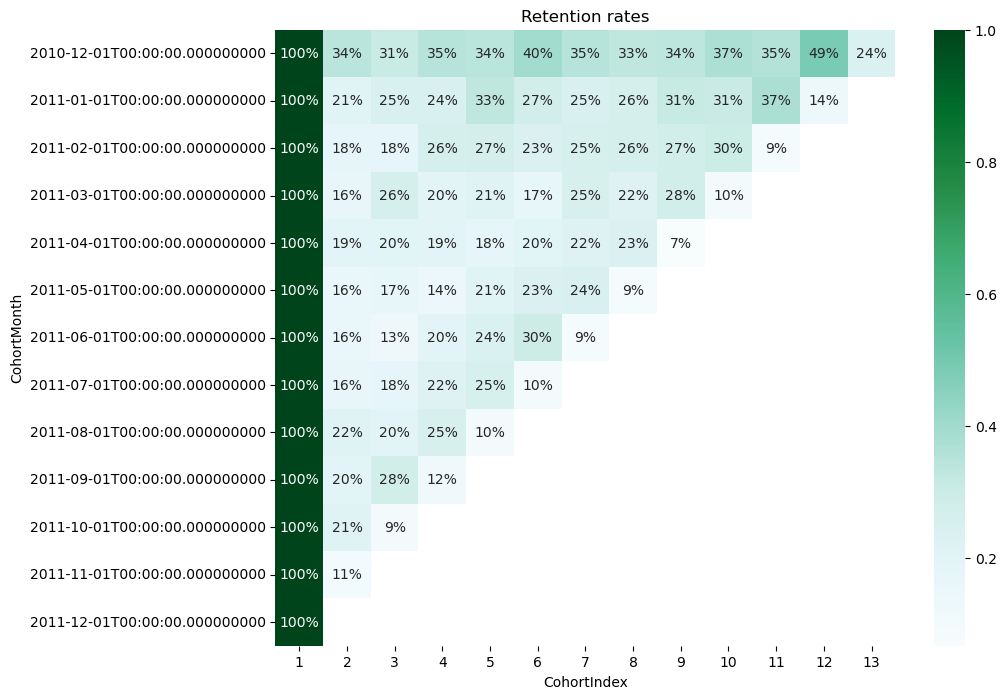

In [33]:
plt.figure(figsize=(10,8))
plt.title("Retention rates")
sns.heatmap(data=retention, annot=True, fmt=".0%", cmap="BuGn" )